<h1>INTRODUCTION</h1>

Super Store is a small retail business located in the United States with stores across 49 states. They sell Furniture, Office Supplies and Technology, their customers are the mass Consumer, Corporate, Home Offices and Small Businesses.

This data contains Sales, Profit, Shipping Cost, Quantity ordered, Product, Customer Segment, Region and Cities, these make of properties or a customer order.

The task is to analyse the sales data and identify weak areas and opportunities for Super Store to boost business growth and customers.

<h4>Business Questions</h4>
<ul>
    <li>Which Manager is the best selling, and most Profitable?</li>
    <li>Which Category is Best Selling and Most Profitable?</li>
    <li>What are the best selling and most profitable sub-category?</li>
    <li>Which is the top selling Product sub category?</li>
    <li>Which customer segment is most profitable?</li>
    <li>Which is the most preferred ship mode?</li>
    <li>Which city has the highest number of sales and profit?</li>
</ul>

Let's define a function for ploting barchart which was used majorly for visualization.

In [1]:
def barchart(datas, vertical = False):
    #Let's assign the first column as the value for x_scale
    x_scale = datas.index
    
    #check if the number of columns are more than 2
    if len(datas.columns) > 1:
        #assign length of the data to a variable x
        x = len(datas.columns)
        
        #Define the theme of our plot using the set_theme attribute of seaborn
        sns.set_theme(style="whitegrid")
        
        #Using matplot sublots to define the size and axis of each chart
        figure , axis = plt.subplots(1, x, figsize=(8, 5))
    
        #Use for loop to iterate through the numbers of columns, this will provide us values for our subplot axis
        for y in range(0, len(datas.columns)):                     
            #Let's assign value to our y scale
            y_scale = datas.columns[y]
            
            #Sort the data by the value of y_scale
            data = datas.sort_values(y_scale, ascending = False)
                
            #Using sns.barplot lets plot the bar chart
            plot = sns.barplot(data = data, x=data.index, y = y_scale, order = list(data.index), palette = 'coolwarm', ax = axis[y])
            
            #Set the title of each bar chart
            plot.set(title = y_scale)
               
            if vertical == True:
                plt.setp(plot.get_xticklabels(), rotation = 'vertical', size = 9)
                
        #Set the spacing between subplots
        figure.tight_layout()           
    else:
        #Define the y scale
        y_scale = datas.columns[0]
        
        #Plot the barchart using seaborn.
        plot = sns.barplot(data = datas, x = x_scale, y = y_scale, order = list(datas.index), palette = 'coolwarm')
        #Set the title of the chart
        plot.set(title = y_scale)
        
        if vertical == True:
            # Rotate axis for x-axis
            plt.setp(plot.get_xticklabels(), rotation = 'vertical', size = 9)

<style>
    ul{
    list-style-type: square;
    list-style-image: url('bullet.png');
    }
</style>
<h2>Preparing The Data</h2>

<p>We will import the necessary library for this analysis exercise.
<ul>
    <li>Pandas - Data Manipulation</li>
    <li>Matplot & Seaborn - Data Visualization</li>
 </ul>
</p>

In [2]:
#Import the libraries for easy Data reading and manipulation.
import pandas as pd

#option to see all rows of the data
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", None)
import numpy as np

#Import the libraries for Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap as LC
import seaborn as sns

#CSV library for reading and writing in csv format
import csv

#The warning library will prevent any warning regrading deprecated values or maps
import warnings
warnings.filterwarnings("ignore")

import os

<p>Variables and their meaning
<ul>
    <li>sl - Sales Data</li>
    <li>st - Returned Status data</li>
    <li>mg - Manager Data
 </ul>
</p>

In [3]:
#Instantiate a variable with the path to the file
file = (r"C:\Users\user\Desktop\PowerBI\Sample Superstore.xlsx")

#Read the data which is in excel format using the pandas.read_excel 
sl = pd.read_excel(file)

#Read the different sheets in the excel file using the sheet name.
st = pd.read_excel(file, sheet_name = "Returns")
mg = pd.read_excel(file, sheet_name = "Users")

<h1>EDA - Exploratory Data Analysis </h1>

Let’s have a look at the data using df.head() and df.tail() function.

In [4]:
sl.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,Labels,Small Box,Avery 49,0.36,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Paper,Small Box,Xerox 1968,0.37,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Small Pack,Acme® Preferred Stainless Steel Scissors,0.56,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,Telephones and Communication,Small Box,V70,0.59,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


The Sales data is a combination of both categorical, geographical and numerical data.

Each row represents an ordered item containing the product category, customer name, order priority, shipmode.It also contains the corresponding cost of shipment, profit and sales.

In [5]:
st.head()

,Order ID,Status
0,65,Returned
1,612,Returned
2,614,Returned
3,678,Returned
4,710,Returned


The status data has two columns, one bearing the Order ID and the Status. The Status column contains only returned.

We will merge the status and sales later on, this will be used to remove orders that were returned. This will enable these items from affecting our analysis.

In [6]:
mg.head()

,Region,Manager
0,Central,Chris
1,East,Erin
2,South,Sam
3,West,William


The manager table has the name of the managers tied to their respective regions.

We will merge this table with that of the sales and status table to have a comprehensive data which we will name as superstore.



The manager's table contains only the first name of the manager, the surnames will be included manually to make the table formal and complete.

In [7]:
#Istantiate a variable array with a list of the managers surnames
surname = ['Martins', 'John', 'Smith', 'Austin']

#Create a new column surname and add the list of names from the variable array
mg['surname'] = surname

#Combine the first name and the last name leaving space inbetween.
mg['Manager Name'] = mg['Manager'] + ' ' + mg['surname']
#Delete individual columns bearing the first name and last name of the manager
mg.drop(['Manager', 'surname'], axis = 1, inplace = True)

#Let's view our newly transfored data
mg.head()

,Region,Manager Name
0,Central,Chris Martins
1,East,Erin John
2,South,Sam Smith
3,West,William Austin


Now we have an improved manager table.

Next we look at .shape() and .info() attributes to gain more insight on our data

In [8]:
sl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

There are no null values in our data, although some of our columns have the wrong data type. We will address that later on in this exercise.

In [9]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Order ID  1634 non-null   int64 
 1   Status    1634 non-null   object
dtypes: int64(1), object(1)
memory usage: 25.7+ KB


In [10]:
mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Region        4 non-null      object
 1   Manager Name  4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes


In [11]:
sl.shape

(9426, 24)

The sales data has a total of 9,426 rows including header and 24 columns.

In [12]:
st.shape

(1634, 2)

The total number of items returned are 1,634. The data has two columns.

In [13]:
mg.shape

(4, 2)

There are four managers, managing the stores in 4 geopolitical zones.

<h2>Data Cleaning</h2>

Before we conduct analysis on the data, we must first check if there are any abnormality in the data such as duplicate rows, null values etc.

For this analysis we will check for the most common issues being missing values.

<h3>Handling missing values</h3>

We will find the sum of null values in each columns.

In [14]:
#Find the total number of null values present in each table.
sl.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

Product Base Margin is the only column with null values. There are 72 total number of null values in the data. 

In [15]:
#Let's calculate the proportion of null values to the totall number of data present in the data.
sl.isnull().sum() / sl.shape[0]  * 100

Row ID                  0.000000
Order Priority          0.000000
Discount                0.000000
Unit Price              0.000000
Shipping Cost           0.000000
Customer ID             0.000000
Customer Name           0.000000
Ship Mode               0.000000
Customer Segment        0.000000
Product Category        0.000000
Product Sub-Category    0.000000
Product Container       0.000000
Product Name            0.000000
Product Base Margin     0.763845
Region                  0.000000
State or Province       0.000000
City                    0.000000
Postal Code             0.000000
Order Date              0.000000
Ship Date               0.000000
Profit                  0.000000
Quantity ordered new    0.000000
Sales                   0.000000
Order ID                0.000000
dtype: float64

The missing values in product margin are less than 1%. Since they are numerical values, rather than drop them I have opted to fill them up with the mean value.

In [16]:
#Fill up the missing null values with the mean of the product margin
sl = sl.fillna(sl.mean()) 

#Let's check the null values to see if the correction has been made.
sl.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

The result shows there are no null values in the data.

<h3>Duplicated Values</h3>

Here, we will find out if the data contains duplicated values or not.

In [17]:
sl.duplicated().sum()

0

The data shows that there are no duplicated values in it. We can now proceed further after confirming this.

<h2>Data Manipulation</h2>

<h3>Merging Tables</h3>

Let's create a function merge, this function will be responsible for merge all 3 tables. It will retrun two tables, one containing the orders that weren't returned and orders that were returned.

In [18]:
def merge(table1, table2, table3):
    #We first merge the sales data and the manager data together first.
    merge1 = pd.merge(table1, table2, on = 'Region')
    
    #Next, we merge the table comprising of sales and manager with the return status table.
    superstore = pd.merge(merge1, table3, on = 'Order ID', how = 'left')
    
    #The cells whose order id wasn't present in the return status data will be empty.
    #Using np.where a new column was created, for cells that are null we will place false.
    superstore['Returned_Status'] = np.where(superstore['Status'] == 'Returned', True, False)
    
    #Drop the status table.
    superstore = superstore.drop('Status', axis = 1)
    
    #Since for our analysis, we are only concerned with the orders that weren't returned, we will divide our 
    #two tables. One for orders not returned and the other for orders that were returned.
    returned_orders = superstore[superstore['Returned_Status'] == True]
    superstore = superstore[superstore['Returned_Status'] == False]
    
    #return the two tables.
    return superstore, returned_orders

In [19]:
superstore, returned_orders = merge(sl, mg, st)

In [20]:
superstore.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Manager Name,Returned_Status
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,Labels,Small Box,Avery 49,0.36,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525,Chris Martins,False
1,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,Office Furnishings,Small Box,Howard Miller 12-3/4 Diameter Accuwave DS ™ Wa...,0.43,Central,Minnesota,Prior Lake,55372,2010-05-12,2010-05-14,803.4705,16,1164.45,86838,Chris Martins,False
2,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,Wrap Bag,Newell 321,0.56,Central,Minnesota,Prior Lake,55372,2010-05-12,2010-05-13,-24.0300,7,22.23,86838,Chris Martins,False
3,24847,Medium,0.05,3.28,4.20,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,Wrap Bag,Newell 351,0.56,Central,Minnesota,Prior Lake,55372,2010-05-12,2010-05-13,-37.0300,4,13.99,86838,Chris Martins,False
4,24848,Medium,0.05,3.58,1.63,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Rubber Bands,Wrap Bag,"OIC Colored Binder Clips, Assorted Sizes",0.36,Central,Minnesota,Prior Lake,55372,2010-05-12,2010-05-13,-0.7100,4,14.26,86838,Chris Martins,False


Here we want to make sure that all the values in each column has the correct data type ascribed to it.

In [21]:
returned_orders.head(10)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Manager Name,Returned_Status
836,3435,Critical,0.03,5.34,5.63,1106,Maxine Collier Grady,Regular Air,Consumer,Office Supplies,Binders and Binder Accessories,Small Box,"Pressboard Data Binder, Crimson, 12"" X 8 1/2""",0.39,Central,Texas,Dallas,75220,2012-06-11,2012-06-12,-60.7200,36,208.73,24519,Chris Martins,True
837,7659,Critical,0.06,5.98,5.46,1106,Maxine Collier Grady,Regular Air,Small Business,Office Supplies,Paper,Small Box,Xerox 1983,0.36,Central,Texas,Dallas,75220,2012-08-28,2012-08-29,-57.6400,63,389.67,54914,Chris Martins,True
838,7660,Critical,0.06,12.44,6.27,1106,Maxine Collier Grady,Regular Air,Small Business,Office Supplies,Storage & Organization,Medium Box,Eldon Simplefile® Box Office®,0.57,Central,Texas,Dallas,75220,2012-08-28,2012-08-30,-27.8300,14,181.16,54914,Chris Martins,True
846,4697,High,0.08,10.35,0.99,1106,Maxine Collier Grady,Regular Air,Small Business,Office Supplies,Labels,Small Box,Avery 503,0.37,Central,Texas,Dallas,75220,2013-10-19,2013-10-21,113.6300,59,567.41,33477,Chris Martins,True
1377,7106,High,0.04,304.99,19.99,1630,Jimmy Han,Regular Air,Home Office,Office Supplies,Binders and Binder Accessories,Small Box,Ibico Hi-Tech Manual Binding System,0.40,Central,Texas,Houston,77095,2013-02-27,2013-03-01,3793.7030,33,9758.70,50721,Chris Martins,True
1659,1801,High,0.08,12.64,4.98,1999,Priscilla Kane,Regular Air,Corporate,Furniture,Office Furnishings,Small Pack,Nu-Dell Executive Frame,0.48,Central,Texas,Houston,77070,2011-05-03,2011-05-04,100.0400,73,915.60,12900,Chris Martins,True
1660,1802,High,0.08,306.14,26.53,1999,Priscilla Kane,Delivery Truck,Corporate,Technology,Office Machines,Jumbo Drum,Okidata ML184 Turbo Dot Matrix Printers,0.56,Central,Texas,Houston,77070,2011-05-03,2011-05-05,308.2200,26,5916.75,12900,Chris Martins,True
1672,5165,Critical,0.10,7.59,4.00,1999,Priscilla Kane,Regular Air,Home Office,Furniture,Office Furnishings,Wrap Bag,"Master Giant Foot® Doorstop, Safety Yellow",0.42,Central,Texas,Houston,77070,2013-09-08,2013-09-09,-10.6100,6,52.26,36743,Chris Martins,True
1776,5786,Medium,0.08,14.27,7.27,2107,Leigh Burnette Hurley,Express Air,Corporate,Office Supplies,Binders and Binder Accessories,Small Box,"GBC Laser Imprintable Binding System Covers, D...",0.38,Central,Illinois,Chicago,60601,2011-09-14,2011-09-14,3.9185,47,656.48,41059,Chris Martins,True
1777,5787,Medium,0.09,300.98,13.99,2107,Leigh Burnette Hurley,Regular Air,Corporate,Technology,Office Machines,Medium Box,Polycom VoiceStation 100,0.39,Central,Illinois,Chicago,60601,2011-09-14,2011-09-15,5455.9600,82,22908.30,41059,Chris Martins,True


<h3>Data Types</h3>

We will ensure that the values for each column in our superstore data has the right corresponding data type. Where the values are categorical, category will be assigned to it and where a different type is expected the right data type will be assigned to it.

In [22]:
#Categorical values
superstore['Product Category'] = superstore['Product Category'].astype('category')
superstore['Product Sub-Category'] = superstore['Product Sub-Category'].astype('category')
superstore['Ship Mode'] = superstore['Ship Mode'].astype('category')
superstore['Order Priority'] = superstore['Order Priority'].astype('category')
superstore['Customer Segment'] = superstore['Customer Segment'].astype('category')
superstore['Product Container'] = superstore['Product Container'].astype('category')
superstore['Row ID'] = superstore['Row ID'].astype('category')

#String Values
superstore['Postal Code'] = superstore['Postal Code'].astype('str')
superstore['Region'] = superstore['Region'].astype('str')
superstore['State or Province'] = superstore['State or Province'].astype('str')
superstore['Manager Name'] = superstore['Manager Name'].astype('str')
superstore['Order ID'] = superstore['Order ID'].astype('str')
superstore['City'] = superstore['City'].astype('str')
superstore['Customer Name'] = superstore['Customer Name'].astype('str')
superstore['Product Name'] = superstore['Product Name'].astype('str')
superstore['Customer ID'] = superstore['Customer ID'].astype('str')

The values in each column has been assigned the correct data type, we now move onto the calculated field.

<h3>Calculated Field </h3>

<h4>Profit Margin</h4>

A new column "Profit Margin" will be created, this field calculates the percentage of profit that exceeds the cost of goods. The formular for this calculation is superstore.profit /superstore.sales * 100

In [23]:
superstore['Profit Margin%'] = (superstore['Profit']/superstore['Sales']) * 100

In [24]:
superstore.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Manager Name,Returned_Status,Profit Margin%
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,Labels,Small Box,Avery 49,0.36,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525,Chris Martins,False,22.372881
1,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,Office Furnishings,Small Box,Howard Miller 12-3/4 Diameter Accuwave DS ™ Wa...,0.43,Central,Minnesota,Prior Lake,55372,2010-05-12,2010-05-14,803.4705,16,1164.45,86838,Chris Martins,False,69.000000
2,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,Wrap Bag,Newell 321,0.56,Central,Minnesota,Prior Lake,55372,2010-05-12,2010-05-13,-24.0300,7,22.23,86838,Chris Martins,False,-108.097166
3,24847,Medium,0.05,3.28,4.20,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,Wrap Bag,Newell 351,0.56,Central,Minnesota,Prior Lake,55372,2010-05-12,2010-05-13,-37.0300,4,13.99,86838,Chris Martins,False,-264.689064
4,24848,Medium,0.05,3.58,1.63,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Rubber Bands,Wrap Bag,"OIC Colored Binder Clips, Assorted Sizes",0.36,Central,Minnesota,Prior Lake,55372,2010-05-12,2010-05-13,-0.7100,4,14.26,86838,Chris Martins,False,-4.978962


<h4>Delivery Days</h4>

This column will calculate the time in days needed to transport thhe goods after ordering. The formula for this exercise is superstore['ship date'] - superstore['Order date']

In [25]:
superstore['Delivery(Days)'] = superstore['Ship Date'] - superstore['Order Date']

In [26]:
superstore.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Manager Name,Returned_Status,Profit Margin%,Delivery(Days)
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,Labels,Small Box,Avery 49,0.36,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525,Chris Martins,False,22.372881,2 days
1,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,Office Furnishings,Small Box,Howard Miller 12-3/4 Diameter Accuwave DS ™ Wa...,0.43,Central,Minnesota,Prior Lake,55372,2010-05-12,2010-05-14,803.4705,16,1164.45,86838,Chris Martins,False,69.000000,2 days
2,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,Wrap Bag,Newell 321,0.56,Central,Minnesota,Prior Lake,55372,2010-05-12,2010-05-13,-24.0300,7,22.23,86838,Chris Martins,False,-108.097166,1 days
3,24847,Medium,0.05,3.28,4.20,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,Wrap Bag,Newell 351,0.56,Central,Minnesota,Prior Lake,55372,2010-05-12,2010-05-13,-37.0300,4,13.99,86838,Chris Martins,False,-264.689064,1 days
4,24848,Medium,0.05,3.58,1.63,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Rubber Bands,Wrap Bag,"OIC Colored Binder Clips, Assorted Sizes",0.36,Central,Minnesota,Prior Lake,55372,2010-05-12,2010-05-13,-0.7100,4,14.26,86838,Chris Martins,False,-4.978962,1 days


<h3>Rearrange Columns</h3>

We will rearrange the columns, placing values with heirachical properties together. This will enable us read the descritive data summary easily later on.

In [27]:
columns = ['Order ID', 'Row ID','Customer ID','Customer Name', 'Customer Segment','Order Priority', 'Ship Mode', 
           'Product Category', 'Product Sub-Category', 'Product Container', 'Product Name', 'Manager Name','Region', 
           'State or Province', 'City', 'Postal Code', 'Order Date', 'Ship Date', 'Shipping Cost', 
           'Product Base Margin', 'Quantity ordered new','Unit Price', 'Discount', 'Delivery(Days)', 'Profit', 'Sales',
          'Profit Margin%']

superstore = superstore.reindex(columns = columns)

The data has been scrupped and manipulated, we can proceed to statistical analysis.

<h2>Descriptive Statistics</h2>

We will do a descriptive statistical analysis. This will give a comprehensive analysis and insight into our data, we use <code>superstore.describe</code> and assign 'include = all' this is to ensure that categorical features are also included in the descriptive table.

In [28]:
#Get the descriptive statistics table summary
superstore.describe(include = 'all')

,Order ID,Row ID,Customer ID,Customer Name,Customer Segment,Order Priority,Ship Mode,Product Category,Product Sub-Category,Product Container,Product Name,Manager Name,Region,State or Province,City,Postal Code,Order Date,Ship Date,Shipping Cost,Product Base Margin,Quantity ordered new,Unit Price,Discount,Delivery(Days),Profit,Sales,Profit Margin%
count,9328,9328.0,9328,9328,9328,9328,9328,9328,9328,9328,9328,9328,9328,9328,9328,9328,9328,9328,9328.000000,9328.000000,9328.000000,9328.000000,9328.000000,9328,9328.000000,9328.000000,9328.000000
unique,6394,9328.0,2703,2703,4,6,3,3,17,7,1263,4,4,49,1424,1697,1418,1450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,43745,2.0,1193,Louis Parrish,Corporate,High,Regular Air,Office Supplies,Paper,Small Box,"Global High-Back Leather Tilter, Burgundy",Chris Martins,Central,California,New York City,10177,2013-07-21 00:00:00,2013-05-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,1.0,27,27,3350,1948,6964,5123,1363,4840,27,2884,2884,988,188,51,24,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-01 00:00:00,2010-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-12-31 00:00:00,2014-01-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.811608,0.512210,13.479310,88.458563,0.049617,2 days 00:43:59.794168096,138.283394,925.242322,-19.287040
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.205449,0.134744,14.602367,282.679690,0.031801,2 days 07:24:00.561096713,998.639987,2501.699543,1687.493333
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.490000,0.350000,1.000000,0.990000,0.000000,0 days 00:00:00,-16476.838000,1.320000,-51413.739488
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.300000,0.380000,5.000000,6.480000,0.020000,1 days 00:00:00,-74.088000,60.417500,-57.095825


<h4>Observations</h4>
You will notice 'NaN' in the descriptive table, it will appear for both categorical data and numerical data. This is because for categorical data, 'NaN' will appear for statiscal calculations since these are not numbers, while numerical values contains 'NaN' for categorical properties

<h5>Categorical</h5>
What we want to focus is the unique count and frequency of the categorical features such as:
<ul>
    <li>There are 4 customer segment and 6 order priority. over 30% of our orders came in from Corporate customer segment and majority of our order priority were High. </li>
    <li>There are 3 Ship Modes. 74.7% of our orders preferred "Regular Air" as the choice of ship mode.</li>
    <li>There are 3 Product category and 17 product sub-category. 54.9% of our orders were for Office Supplies in product category and at least 14% purchases are for papers.</li>
    <li>We have stores across 4 regions, 49 state or province and 1424 cities America. We have more stores in the central region, California has more stores of the states and New york city has more stores than other states.</li>
</ul>

<h5>Numerical Parameters</h5>
<ul>
    <li>75% of our orders makes at least 50% of our profit margin.</li>
    <li>-19% mean suggestes that the distribution of profit margin is left skewed, 50% of our orders have a profit margin of 1.29%.</li>
    <li>Lost making order can go up 51413% losses. Emphasis on this loss making sales must be placed to cut the losses.</li>
</ul>

Analysis will performed to test these observations.

<h2>Exploratory Data Analysis</h2>

<h3>1. Which Manager is the best selling, and most Profitable?</h3>

Best Selling means looking at the Sales and Most Profitable is referring to the Profit made from each sale. The sales, profit and quantity will be grouped by Manager and run the df.group().sum and pd.DataFrame() functions.

In [29]:
# Group sales, profit and quantity by category
manager_analysis = pd.DataFrame(superstore.groupby(['Manager Name'])[['Sales', 'Profit', 'Quantity ordered new']].sum().sort_values('Sales', ascending = False))
manager_analysis

,Sales,Profit,Quantity ordered new
Manager Name,,,
Chris Martins,2442140.23,503145.694567,37327
Erin John,2334314.92,371261.727545,33506
William Austin,2310618.52,308061.766292,31903
Sam Smith,1543586.71,107438.306616,22999


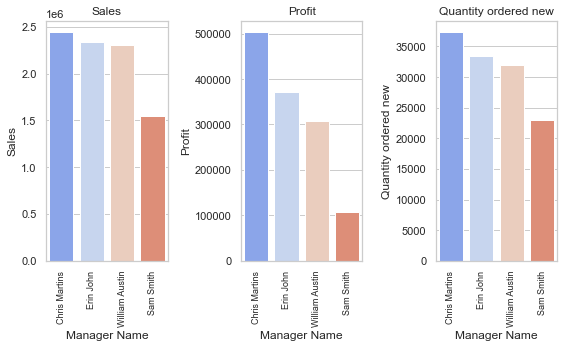

In [30]:
barchart(manager_analysis, vertical = True)

Our Observations are:
<ul>
    <li>Manager Sam Smith has the least Sales, Profit and Quantity ordered.</li>
    <li>Manager Chris Martins has the highest sales, Profit and Quantity ordered. 30% of our orders came from Chris Martins.</li>
    <li>Although Erin John and William Austin made similar sales, 

<h3>2. Which Category is Best Selling and Most Profitable? </h3>
Best Selling means looking at the Sales and Most Profitable is referring to the Profit. We will group the Sales, Profit and also Quantity by Category and run the df.group().sum and pd.DataFrame() functions.

In [31]:
#Group the data by products category,summing the Sales, Profit and Quantity ordered. 
category = pd.DataFrame(superstore.groupby(['Product Category'])[['Sales', 'Profit', 'Quantity ordered new']].sum().
                        sort_values('Sales', ascending = False))
category

,Sales,Profit,Quantity ordered new
Product Category,,,
Technology,3449476.94,675242.243268,30889
Furniture,3039651.04,176929.268660,25854
Office Supplies,2141532.40,437735.983092,68992


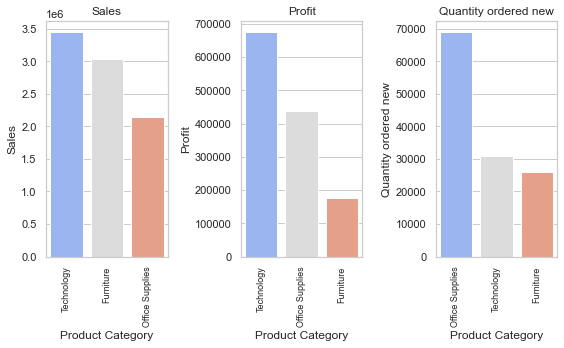

In [32]:
barchart(category, vertical = True)

Observations:
<ul>
    <li>Technology is the best selling product category, it also recorded the most profit.</li>
    <li>Although Furniture and Technology recorded similar sales, Furniture has the least amount of profit and quantity ordered.</li>
    <li>Office Supplies sells the most in terms of quantity ordered as it is relatively a cheap product.</li> 
    <li>Difference between Technology and furniture rose from 10% in sales to 39% in profit. Suggesting that majority of our negative profit(profit margin) values are located in the furniture category. Extra analysis on furniture is required to understand the sub-categories in the furniture category causing the decrease in profit.</li>

<h3>3. What are the best selling and most profitable sub-category?</h3>

In [33]:
#Group the data by product sub-category
sub_category = pd.DataFrame(superstore.groupby(['Product Sub-Category'])[['Sales', 'Profit']].sum().sort_values('Sales', ascending = False))

sub_category

,Sales,Profit
Product Sub-Category,,
Office Machines,1189217.89,162346.594040
Chairs & Chairmats,1132027.59,164499.742760
Telephones and Communication,1116673.86,295765.982686
Tables,971078.30,-73758.552703
Copiers and Fax,661211.93,129156.684030
Binders and Binder Accessories,572334.22,213349.257842
Storage & Organization,553783.92,7452.616727
Bookcases,499375.21,-7175.308564
Computer Peripherals,482373.26,87972.982513


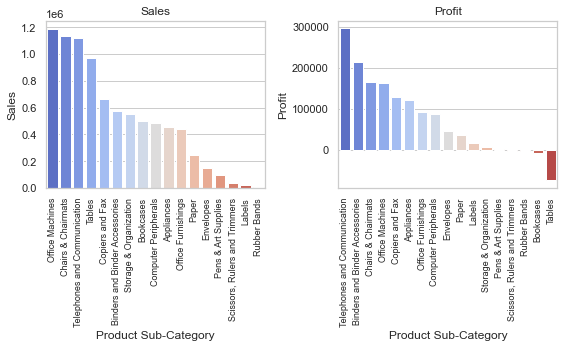

In [34]:
barchart(sub_category, vertical = True)

Observations:
<ul>
    <li>Office machines and chairs & Chairmats are the top two selling product sub category.</li>
    <li>Telephones and Communication, Binders and Binder Accessories and Chairs & Chairmats	are the most profitable, marketing strategies has to focus on these products.</li>
    <li> Scissors, Rulers and Trimmers, Rubber Bands, Bookcases, and Tables recorded losses. Tables alone contributed 70% of our lost from the product subcategory recorded.These products can be considered for dropping or increase the sale price, profit margin and suspend discount on these products.</li>
    <li> Analysis on the numerical attributes of the product Tables to determine the optimal values needed to overturn the huge losses being experienced</li>

<h5>Exporting "Table" sub-category for further analysis...</h5>

In [35]:
superstore.to_csv('Superstore', sep=',', encoding='utf-8')

In [36]:
#Filter the orders data for the properties of Tables alone.
sub_table = superstore[superstore['Product Sub-Category'] == 'Tables']
sub_table = pd.DataFrame(sub_table.reset_index())

superstore.to_csv('Superstore', sep=',', encoding='utf-8')
#Create a folder to save the sub category data for Tables.
os.makedirs("Table_analysis2", exist_ok=True)

#Using with open to create and write a data
with open(
        os.path.join("Table_analysis2", f"Superstore.csv"),
        "w") as table:
    writer = csv.writer(table)
    for data in superstore:
        writer.writerow(data)

 <h3>4. Which is the top selling Product sub category?</h3>

In [37]:
#Group the data by product subcategory, and sum the quantity ordered.
sub_quantity = pd.DataFrame(superstore.groupby(['Product Sub-Category'])[['Quantity ordered new']].sum())

#Sort the table by the quantity ordered in decreasing order
sub_quantity = sub_quantity.sort_values('Quantity ordered new', ascending = False).reset_index()
#pd.DataFrame(sub_quantity.sort_values('Quantity ordered new', ascending = False).reset_index())
sub_quantity

,Product Sub-Category,Quantity ordered new
0,Paper,18160
1,Telephones and Communication,13870
2,Binders and Binder Accessories,12773
3,Office Furnishings,12188
4,Computer Peripherals,11322
5,Pens & Art Supplies,10190
6,Storage & Organization,7814
7,Appliances,6994
8,Chairs & Chairmats,6098
9,Tables,4926


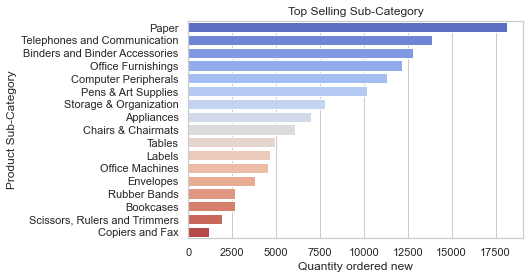

In [38]:
# Plot Bar Plot for Top Selling Sub-Category
sns.set_theme(style="whitegrid")
sns.barplot(data = sub_quantity, y = sub_quantity['Product Sub-Category'], x = sub_quantity['Quantity ordered new'], order = list(sub_quantity['Product Sub-Category']), palette = "coolwarm")
plt.title("Top Selling Sub-Category")
plt.show()

Observations:
<ul>
    <li>Paper, Telephones and Communication, and Binders and Binder Accessories are the top 3 selling product sub-category. Telephones and Communication, and Binders and Binder Accessories are the most profitable product sub-category.</li>
    <li>Copiers and Fax is the least ordered quantity of product sub-category, but as it is a relatively expensive office equipment that is usually used for few years, it is understandable that it sells the least among all.</li>

<h3>5. Which customer segment is most profitable?</h3>

In [39]:
cus_segment = pd.DataFrame(superstore.groupby(['Customer Segment'])[['Profit']]
                           .sum().sort_values('Profit', ascending = False))
cus_segment

,Profit
Customer Segment,
Corporate,493116.855083
Small Business,314055.067102
Home Office,281986.465091
Consumer,200749.107743


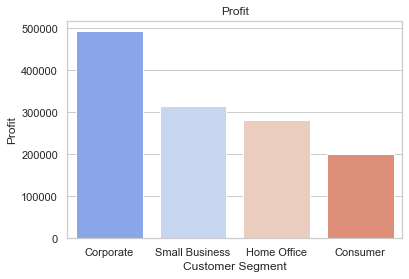

In [40]:
barchart(cus_segment)

Corporate segment is the most profitable, followed closely by small businesses. Consumer segment is the least profitable segment. Hence, marketing strategies has to target and place more focus on retaining corporate and small businesses.

<h3>6. Which is the most preferred ship mode?</h3>

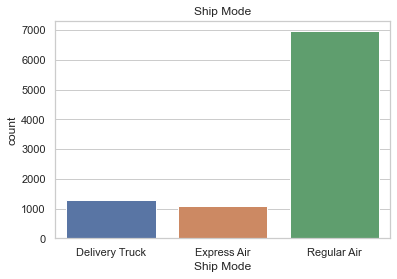

In [41]:
# Plot shipment mode
sns.set_theme(style="whitegrid")
sns.countplot(superstore['Ship Mode'] )
plt.title("Ship Mode")
plt.show()

Regular Air is the most preferred shipping mode by customers.

<h3>7. Which city has the highest number of sales?</h3>

In [42]:
#Group the data by their respective cities
city_analysis = pd.DataFrame(superstore.groupby(['City'])[['Sales', 'Profit', 'Quantity ordered new']]
                             .sum().sort_values('Sales', ascending = False))

#Top 10 profitable cities
top10_cities = city_analysis[:10]
top10_cities

,Sales,Profit,Quantity ordered new
City,,,
New York City,499784.78,36712.092210,7258
Los Angeles,467071.08,14906.906380,6451
Seattle,289510.10,18070.075127,3217
Washington,193885.91,21876.899520,2292
Chicago,151907.25,2825.030100,3507
Miami,145382.72,2770.011411,1551
Philadelphia,144438.05,9186.849700,1829
Boston,117923.18,11029.622900,2755
Detroit,117681.66,5559.702580,1993


In [43]:
#Least selling cities.
last10_cities = city_analysis[-10:]
last10_cities

,Sales,Profit,Quantity ordered new
City,,,
Vineland,16.71,-2.810000,15
Tiverton,13.53,-6.730000,1
Willimantic,12.55,-14.076000,1
Falmouth,11.41,7.872900,3
Newburyport,10.22,0.087040,3
Scituate,9.89,-43.480000,2
Waterford,8.24,-2.291352,4
Milton,7.12,-1.410000,4
Rutherford,3.99,-3.930000,1


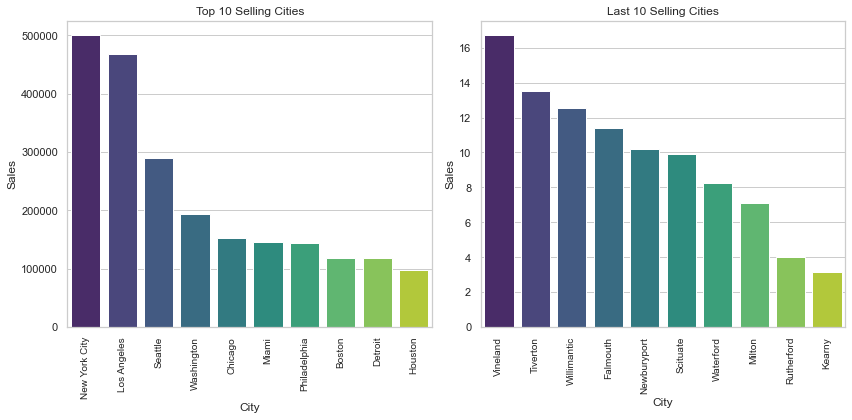

In [44]:
#Plot the bar chart for the top and last cities.
sns.set_theme(style="whitegrid")

# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

# Plot Bar Plot for Best Selling Sub-Category
city1 = sns.barplot(data = top10_cities, x = top10_cities.index, y=top10_cities.Sales, palette = 'viridis', ax=axis[0])
city2 = sns.barplot(data = last10_cities, x = last10_cities.index, y=last10_cities.Sales, palette = 'viridis', ax=axis[1])

#Set Title
city1.set(title="Top 10 Selling Cities")
city2.set(title = "Last 10 Selling Cities")

#Rotate axis for x-axis
city1.set_xticklabels(city1.get_xticklabels(),rotation = "vertical", size = 10)
city2.set_xticklabels(city2.get_xticklabels(),rotation = "vertical", size = 10)


# Set spacing between subplots
figure.tight_layout()

<h3>8. Which state has has the least Profit?</h3>

In [45]:
#Group the data by their respective cities and sort the values by the profit in a descending format
city_analysis = pd.DataFrame(superstore.groupby(['City'])[['Sales', 'Profit', 'Quantity ordered new']]
                             .sum().sort_values('Profit', ascending = False))

#Top 10 profitable cities
top10_cities = city_analysis[:10].sort_values('Profit', ascending = False)
top10_cities

,Sales,Profit,Quantity ordered new
City,,,
New York City,499784.78,36712.092210,7258
Washington,193885.91,21876.899520,2292
Seattle,289510.10,18070.075127,3217
Portland,27763.06,16994.990305,133
Danville,37040.89,15908.663636,226
Kissimmee,7930.77,15739.187600,73
Los Angeles,467071.08,14906.906380,6451
Houston,97423.67,13909.688400,1843
Jackson,19557.92,12773.019880,283


In [46]:
#Least selling cities.
last10_cities = city_analysis[-10:].sort_values('Profit', ascending = False)
last10_cities

,Sales,Profit,Quantity ordered new
City,,,
Boise,16440.82,-7951.559580,198
Palm Springs,4294.78,-8555.858700,57
Hacienda Heights,9038.79,-8567.014736,165
Pine Hills,6063.53,-9621.040275,47
Des Moines,12678.11,-10412.596840,150
Bozeman,15745.16,-12362.124368,165
Durango,16824.78,-13753.102596,144
Hattiesburg,372.80,-14441.297580,18
Galesburg,10540.63,-15290.478000,69


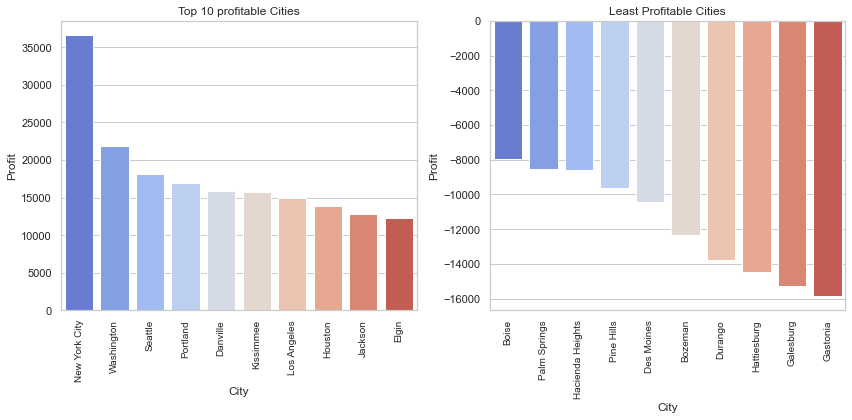

In [47]:
#Plot the bar chart for the top and last cities.
sns.set_theme(style="whitegrid")

# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

# Plot Bar Plot for Best Selling Sub-Category
city1 = sns.barplot(data = top10_cities, x = top10_cities.index, 
                    y=top10_cities.Profit, palette = "coolwarm", ax=axis[0])
city2 = sns.barplot(data = last10_cities, x = last10_cities.index, 
                    y=last10_cities.Profit, palette = "coolwarm", ax=axis[1])

#Set Title
city1.set(title="Top 10 profitable Cities")
city2.set(title = "Least Profitable Cities")

#Rotate axis for x-axis
city1.set_xticklabels(city1.get_xticklabels(),rotation = "vertical", size = 10)
city2.set_xticklabels(city2.get_xticklabels(),rotation = "vertical", size = 10)


# Set spacing between subplots
figure.tight_layout()

Observations:
<ul>
    <li>New York City is the best selling and most profitable city.</li>
    <li>The disparity between the top 10 and the least 10 cities is very huge</li>
    <li>Some cities incur losses upto $16,000, this should be looked into.</li>
</ul>

<h3>Strategic Recommendations</h3>
Let's revist the business questions and make high-leve business recommendations.

<h4>Business Questions</h4>
<ul>
    <li>Which Manager is the best selling, and most Profitable?</li>
    <li>Which Category is Best Selling and Most Profitable?</li>
    <li>What are the best selling and most profitable sub-category?</li>
    <li>Which is the top selling Product sub category?</li>
    <li>Which customer segment is most profitable?</li>
    <li>Which is the most preferred ship mode?</li>
    <li>Which city has the highest number of sales and profit?</li>
</ul>

<h4>Recommendations</h4>
<ul>
    <li>Focus on Technology sub-category, Office Machines, and Telephones and Communication they are among the highest selling and most profitable. we can promote it with less profitable product sub-category such as Office Furnishings, Tables, Pens & Art Supplies, Scissors, Rulers and Trimmers Labels Rubber Bands to offset the losses.</li>
    <li>Sales of Scissors, Rulers and Trimmers, Rubber Bands, Bookcases, and Tables results in huge losses, it's important that we bundle them with high selling and profittable product sub-category.</li>
    <li>Not specified order priority should be completely struck off, this will prevent customer's order from getting to them after 90 days.</li>
    <li>For Corporate customers, these people might be busy with work and less likely to spend time selecting individual products, we can create packages that best suits this type of customer.</li>
    <li>We should consider dropping from the catalogue products that incur losses on the company such as Scissors, Rulers and Trimmers, Rubber Bands, Bookcases, Tables. Alternatively, We can consider changing suppliers or bargain for a cheaper production cost.</li>
    <li> Manager Sam Smith recorded the least sales, profit and quantity sold, emphasis on the need to conduct analytical studies to ascertain the challenges experienced by the manager, also we should consider promoting the least profitable products with the most profitable products.</li>
    <li>Home Office and Corporate make up more than 60% of our orders. We should target customers in these categories, especially customers from the central and eastern regions in the top 10 cities.</li>
    <li>We can introduce special promotions and bundles for Home Office and Corporate customer segment. Sending these promotions as email will be effective as these customers are very busy but will have time to check their emails.</li>